In [24]:
%load_ext autoreload
%autoreload 2
import pickle


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from main import tools, ode, optimize, net, get_data, model
import gpytorch

In [26]:
with open('hrrr/datas/datas_fit.pkl', 'rb') as f:
    datas = pickle.load(f)

In [27]:
len(datas)

16

In [55]:
indices = datas[4].indices[:2000]

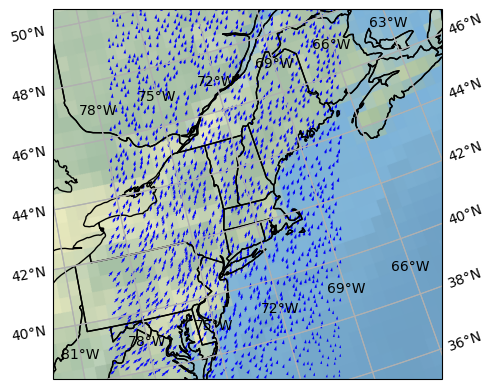

In [58]:
f = datas[6].plot_vel(indices, color = "blue")

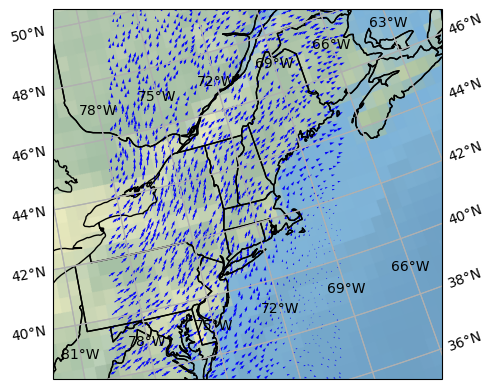

In [59]:
f = datas[6].plot_vel_data(indices, color = "blue")